# THE SPARKS FOUNDATION 

# Author : Thiviyaa S

## Graduate Rotational Internship Program

### Task 2 : Prediction using Unsupervised Machine Learning

#### Predict the optimum number of Clusters and represent it Visually

### Step 1 : Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline

### Step 2 : Importing Data from the Source

In [2]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)
print("Data is successfully imported")

Data is successfully imported


In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Reading the dataset

In [4]:
df.head() #printing the top line data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail() #printing the bottom line data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
ler=LabelEncoder()
df['Species']=ler.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

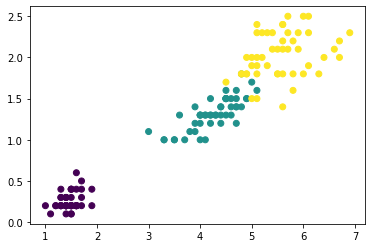

In [12]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


### Step 3 : Data Visualization

<AxesSubplot:>

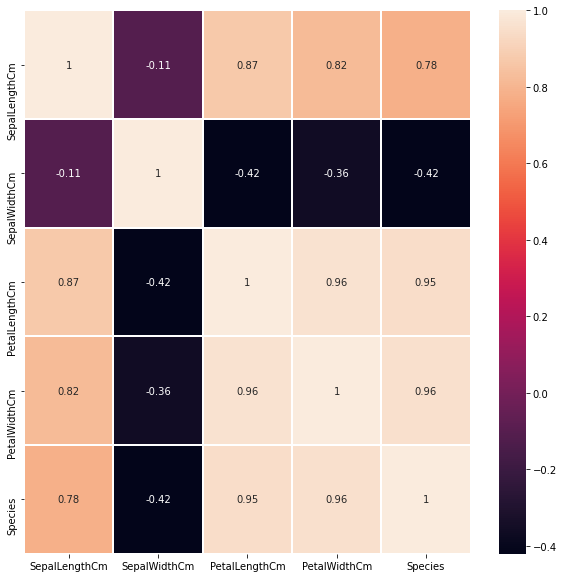

In [14]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,annot=True)

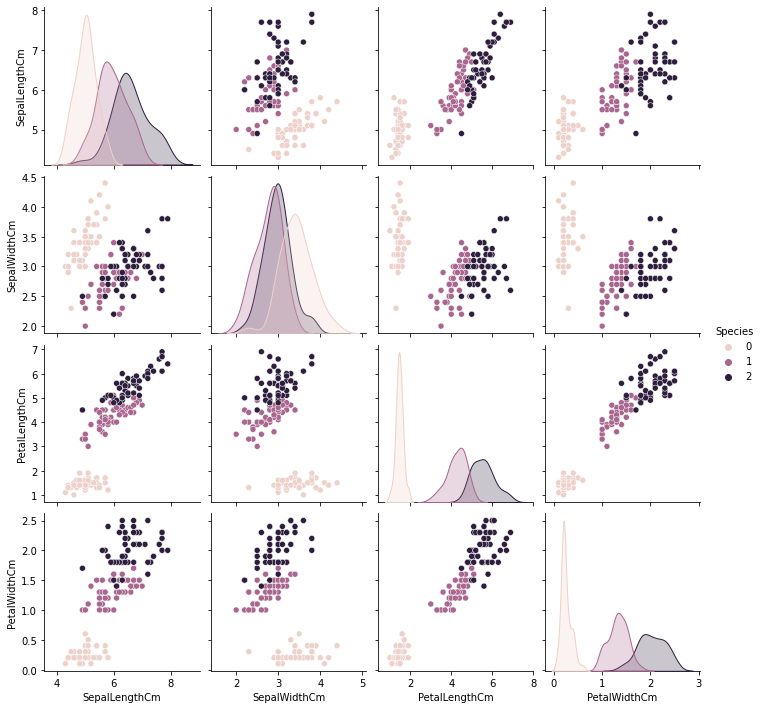

In [15]:
sns.pairplot(df, hue="Species")

### Step 4 : Data Preprocessing

In [16]:
df1=df.iloc[:,[0,1,2,3]].values

### Step 5 : Model Training

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.38097880813144,
 34.11707094757095,
 29.75801580972634,
 27.744997920380285,
 25.76965268228504]

### Step 6 : Finding the number of Optimum Clusters

c:\users\netsys\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


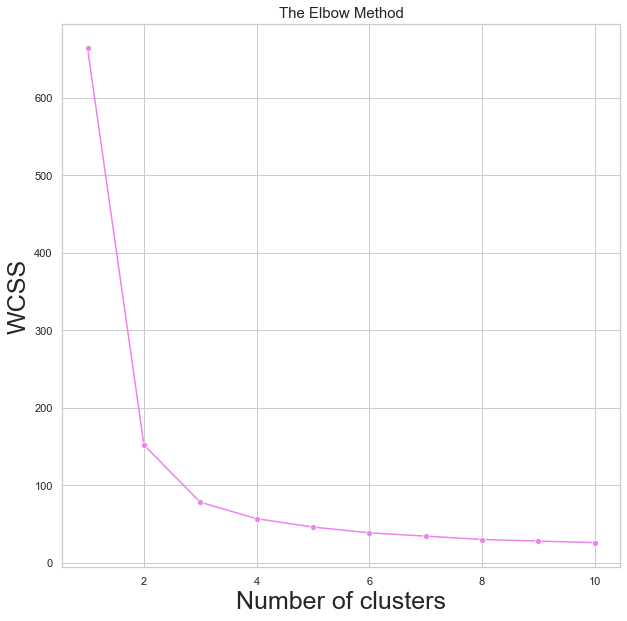

In [18]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='violet')
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=25)
plt.ylabel('WCSS',fontsize=25)
plt.show()


### Step 7 : Initialization using K-Means

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Step 8 : Visualizing the Model Cluster

No handles with labels found to put in legend.


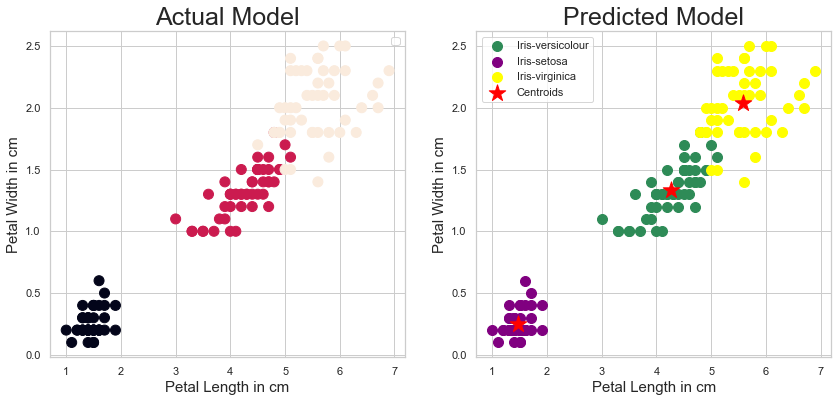

In [20]:
fig = plt.figure(figsize=(14, 6))
colors = np.array(['seagreen', 'purple', 'yellow'])
plt.subplot(1, 2, 1)
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],s= 100, c=df.Species.values)
plt.title('Actual Model',fontsize=25)
plt.ylabel('Petal Width in cm',fontsize=15)
plt.xlabel('Petal Length in cm',fontsize=15)
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Iris Flower Clusters',fontweight ='bold', fontsize=25)
plt.scatter(df1[y_kmeans == 0, 2], df1[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df1[y_kmeans == 1, 2], df1[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df1[y_kmeans == 2, 2], df1[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Predicted Model',fontsize=25)
plt.ylabel('Petal Width in cm',fontsize=15)
plt.xlabel('Petal Length in cm',fontsize=15)
plt.legend()




### Succesfully carried out Prediction using Unsupervised Machine Learning